#ABOUT DATASET
dataset link:https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019
##Context
This dataset contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and it's qualities.

##Content
* artist: Name of the Artist.
* song: Name of the Track.
* duration_ms: Duration of the track in milliseconds.
* explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
* year: Release Year of the track.
* popularity: The higher the value the more popular the song is.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* genre: Genre of the track.

In [84]:
#importing pre-requisites
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

In [85]:
df=pd.read_csv("spotify.csv")

In [86]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [87]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [88]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [89]:
df.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df.duplicated().sum()

0

In [92]:
df.shape

(1941, 18)

# Data Analysis with Pandas

In [93]:
#total number of explicit and non-explicit songs
df['explicit'].value_counts()

False    1404
True      537
Name: explicit, dtype: int64

In [94]:
#years with the highest number of hits
df.year.value_counts().head()

2012    113
2017    110
2001    106
2018    104
2010    103
Name: year, dtype: int64

In [95]:
#total pop songs
df[df['genre'].str.contains('pop')]['genre'].count()

1582

In [96]:
#TOP 5 artists with most amount of hits
df['artist'].value_counts().head()

Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: artist, dtype: int64

In [97]:
#Top 5 artists by popularity
df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head()

artist
Tom Odell            88.0
The Neighbourhood    87.0
WILLOW               86.0
Lewis Capaldi        84.0
Gesaffelstein        84.0
Name: popularity, dtype: float64

# Visulizations

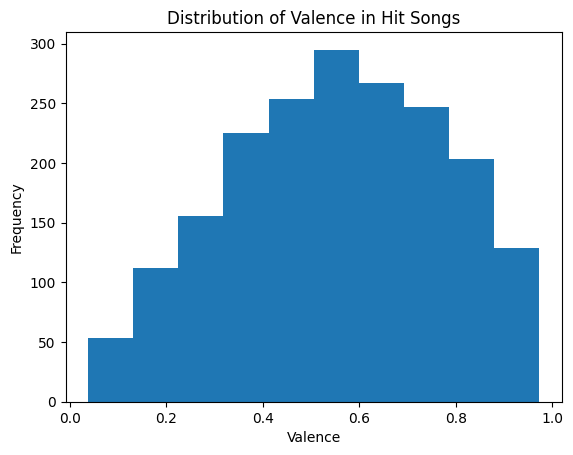

In [103]:
#emotions conveyed in songs
import matplotlib.pyplot as plt

plt.hist(df['valence'], bins=10)

plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Distribution of Valence in Hit Songs')

plt.show()

This suggests that most hit songs have neutral or slightly positive emotions conveyed by them.

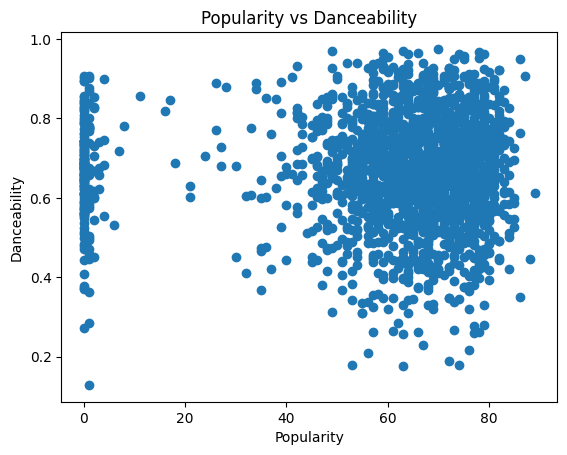

In [115]:
#Popularity vs Danceability
import matplotlib.pyplot as plt

plt.scatter(df['popularity'], df['danceability'])

plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Popularity vs Danceability')

plt.show()

This shows that popularity is highly correlated with dancebility i.e popular songs are generally high in dancebility number.

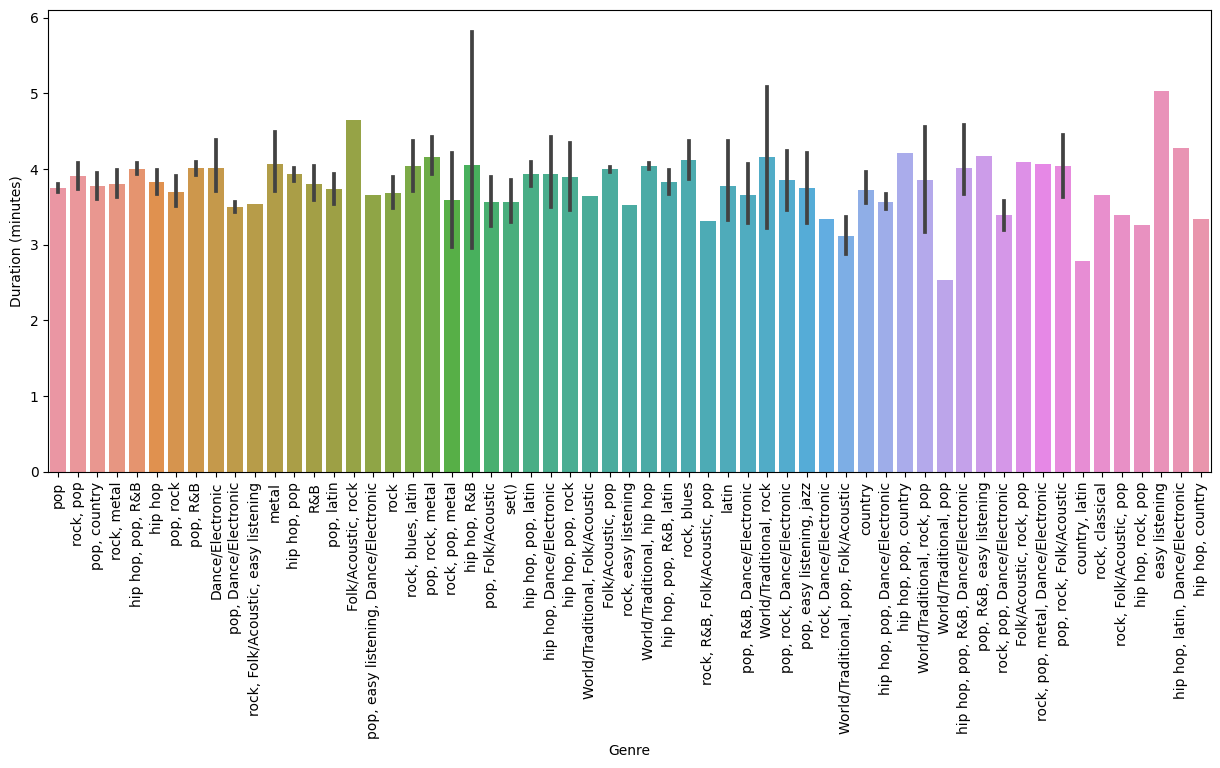

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converting duration from ms to minutes
df['duration_min'] = df['duration_ms'] / (1000 * 60)

#Average duration of songs as per genre
sns.barplot(x='genre', y='duration_min', data=df)

plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 6)
plt.show()


Easy listening genre has higher duration songs on average

In [113]:
#top 10 artists as per dancebility
import plotly.express as px

dance = df.sort_values('danceability', ascending=False).head(10)

fig = px.bar(dance, x='artist', y='danceability', title='Top 10 Artists with Highest Danceability',
             text='danceability', labels={'danceability': 'Danceability'})

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.update_layout(xaxis_title='Artist', yaxis_title='Danceability')

fig.show()

Timbaland has high dancebility songs among all artists

In [126]:
fig=px.scatter(df,x='energy',y='danceability',color='danceability',template='plotly_dark',hover_data=['song','artist'])
fig.update_layout(title='Energy vs Dancebility')

In [133]:
fig=px.scatter(df,x='energy',y='loudness',template='plotly_dark',color='loudness')
fig.update_layout(title="Energy vs loudness")

As we can see that the energy levels are highly correlated with loudness i.e louder songs have higher energy levels

In [132]:
import plotly.express as px

fig = px.scatter(df, x='loudness', y='acousticness',template='plotly_dark',color='acousticness', hover_data=['song','artist'])
fig.update_layout(title='Loudness vs Acousticness')
fig.show()

The songs with lower acousticness tend to have higher loudness levels. This suggests that electronic-based songs are generally louder than acoustic-based songs.